# Pandas Basics — Part 1

In this lesson, we're going to introduce some of the basics of [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files.

We will cover how to:

* Import Pandas
* Read in a CSV file
* Explore and filter data
* Make simple plots and data visualizations
* Write a CSV file

___

## Dataset
### The Bellevue Almshouse Dataset

```{epigraph}
Nineteenth-century immigration data was produced with the express purpose of reducing people to bodies; bodies to easily quantifiable aspects; and assigning value to those aspects which proved that the marginalized people to who they belonged were worth less than their elite counterparts.

-- Anelise Shrout, ["(Re)Humanizing Data"](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/)
```

The dataset that we're working with in this lesson is the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/), created by historian and DH scholar Anelise Shrout. It includes information about Irish-born immigrants who were admitted to New York City's Bellevue Almshouse in the 1840s.

The Bellevue Almshouse was part of New York City's public health system, a place where poor, sick, homeless, and otherwise marginalized people were sent — sometimes voluntarily and sometimes forcibly. Devastated by widespread famine in Ireland, many Irish people fled their homes for New York City in the 1840s, and many of them ended up in the Bellevue Almshouse.

We're using the [Bellevue Almshouse Dataset](https://www.nyuirish.net/almshouse/the-almshouse-records/) to practice data analysis with Pandas because we want to think deeply about the consequences of reducing human life to data. As Shrout argues in [her essay](https://crdh.rrchnm.org/essays/v01-10-(re)-humanizing-data/), this data purposely reduced people to bodies and "easily quantifiable aspects" in order to devalue their lives, potentially enacting "both epistemic and physical violence" on them.

We want to think about how responsible data analysis requires more than just technical tools like Pandas. It also requires an interrogation of the data. Who collected this data? How and why was this data collected? What assumptions are present in this data? What are the consequences of this data in the world? What does this data reflect about the world? For example, Shrout claims that the "Bellevue administrators framed any ailments or difficulties inmates might have had as a consequence of [their immigration] status" — perhaps best exemplified by the fact that a frequent "disease" in the dataset is "recent emigrant." Below we're going to explore the prevalence of "recent emigrant" in the data as well as other salient patterns.

___

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [12]:
import pandas as pd

The above `import` statement not only imports the Pandas library but also gives it an alias or nickname — `pd`. This alias will save us from having to type out the entire words `pandas` each time we need to use it. Many Python libraries have commonly used aliases like `pd`.

## Read in CSV File

To read in a CSV file, we will use the function `pd.read_csv()` and insert the name of our desired file path. 

In [14]:
bellevue_df = pd.read_csv('../data/bellevue_almshouse_modified.csv', delimiter=",")

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) — often abbreviated as *df*, e.g., *bellevue_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

When reading in the CSV file, we also specified the `encoding` and `delimiter`. The `delimiter` specifies the character that separates or "delimits" the columns in our dataset. For CSV files, the delimiter will most often be a comma. (CSV is short for *Comma Separated Values*.) Sometimes, however, the delimiter of a CSV file might be a tab (`/t`) or, more rarely, another character.

## Select Columns

To select a column from the DataFrame, we will type the name of the DataFrame followed by square brackets and a column name in quotations marks.

In [15]:
bellevue_df['disease']

0       recent emigrant
1       recent emigrant
2       recent emigrant
3       recent emigrant
4       recent emigrant
             ...       
9579                NaN
9580               lame
9581                NaN
9582                NaN
9583        destitution
Name: disease, Length: 9584, dtype: object

Technically, a single column in a DataFrame is a [*Series* object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro).

In [ ]:
type(bellevue_df['disease'])

A Series object displays differently than a DataFrame object. To select a column as a DataFrame and not as a Series object, we will use two square brackets.

## Count Values

To count the values in a column, we can use the `.value_counts()` method.

In [16]:
bellevue_df['disease'].value_counts()

sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
                   ... 
disabled              1
del femur             1
spinal disease        1
ague                  1
smallpox              1
Name: disease, Length: 75, dtype: int64

Look through the so-called "diseases" recorded in the Bellevue Almshouse data and consider what these categories reflect about New York City in the 1840s, particularly with regard to immigration status.

To select the top 10 most frequent values in the "disease" column, we can combine `value_counts()` with regular Python list slicing.

In [17]:
bellevue_df['disease'].value_counts()[:10]

sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
pregnant            134
sore                 79
intemperance         71
illegible            47
typhus               46
Name: disease, dtype: int64

## Make Plots

Pandas makes it easy to create plots and data visualizations. We can make a simple plot by adding `.plot()` to any DataFrame or Series object that has appropriate numeric data.

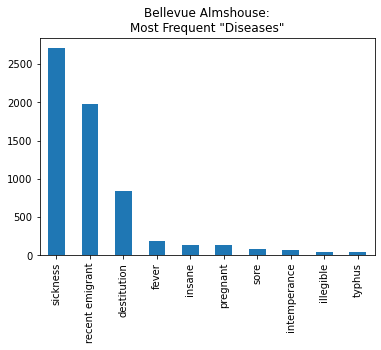

In [18]:
bellevue_df['disease'].value_counts()[:10].plot(kind='bar', title='Bellevue Almshouse:\nMost Frequent "Diseases"')

 We specify the title with the `title=` parameter and the kind of plot by altering the `kind=` parameter:
* ‘bar’ or ‘barh’ for bar plots

* ‘hist’ for histogram

* ‘box’ for boxplot

* ‘kde’ or ‘density’ for density plots

* ‘area’ for area plots

* ‘scatter’ for scatter plots

* ‘hexbin’ for hexagonal bin plots

* ‘pie’ for pie plots
 
For example, to make a horizontal bar chart, we can set `kind='barh'`

## Your turn!

Calculate value counts for the “profession” column and make a pie chart of the top 10 most frequent values.

In [ ]:
#Your code here

**Discuss**: Examine these diseases and professions, and choose a few to discuss with your group. What do these data categories reflect about American society in the 1840s, as well as about the conditions for immigrants at the time? Can you think of ways that people are reduced to data points today?

There are a few important things to note about the DataFrame displayed here:

* Index
    * The bolded ascending numbers in the very left-hand column of the DataFrame is called the Pandas *Index*. You can select rows based on the Index.
    * By default, the Index is a sequence of numbers starting with zero. However, you can change the Index to something else, such as one of the columns in your dataset.

* Truncation
    * The DataFrame is truncated, signaled by the ellipses in the middle `...` of every column.
    * The DataFrame is truncated because we set our default display settings to 100 rows. Anything more than 100 rows will be truncated. To display all the rows, we would need to alter Pandas' default display settings yet again.

* Rows x Columns
    * Pandas reports how many rows and columns are in this dataset at the bottom of the output (9584 x 8 columns).
    * This is very useful!

## Calculate Summary Statistics

To calculate summary statistics for every column in our DataFrame, we can use the `.describe()` method.

By default, `.describe()` will only compute columns with numerical data. To include all columns, we can use `include='all`.

In [ ]:
bellevue_df.describe(include='all')

Here are some insights that can be gleaned from these summary statistics:
- For the column **date_in**, the earliest recorded admission to the Bellevue Almshouse (**first**) is 1846-01-01  and the latest (**last**) is 1847-12-31 
- For the column **first_name**, the most frequently occurring first name (**top**) is Mary, which appears 979 times (**freq**)
- For the column **last_name**, the most frequently occurring last name (**top**) is Kelly, which appears 137 times (**freq**)
- For the column **age**, average age in the dataset (**mean**) is 30, the youngest (**min**) is .8, and the oldest (**max**) is 97
- For the columns **disease** and **profession**, there are 75 unique (**unique**) diseases and 172 unique (**unique**) professions
- For the column **children**, there are 37 rows that include information about children (**count**) (i.e., rows that do not have blank values)



## Filter Data

We can filter a Pandas DataFrame to select only certain values. Filtering data by certain values is similar to selecting columns.

We type the name of the DataFrame followed by square brackets and then, instead of inserting a column name, we insert a True/False condition. For example, to select only rows that contain the value "teacher," we insert the condition `bellevue_df['profession'] == 'teacher'`

In [ ]:
bellevue_df[bellevue_df['profession'] == 'teacher']

It can be helpful to isolate this condition and see that it produces a long list of True/False pairs for every row.

In [ ]:
bellevue_df['profession'] == 'teacher'

Filtering DataFrames can sometimes get confusing and unwieldy (as conditions within conditions pile up like Russian dolls). It can be helpful to make a separate variable for a filter, as below.

In [ ]:
teacher_filter = bellevue_df['profession'] == 'teacher'

In [ ]:
bellevue_df[teacher_filter]

In a similar vein, it's often useful to make a new variable for a filtered DataFrame. For example, let's say we wanted to look at only the women in the dataset and see the most commons professions.

In [ ]:
women_filter = bellevue_df['gender'] == 'w'

In [ ]:
bellevue_women = bellevue_df[women_filter]

In [ ]:
bellevue_women['profession'].value_counts()

In [ ]:
bellevue_women['profession'].value_counts().plot(kind='pie', figsize=(10,10), title='Bellevue Almshouse:\nMost Frequent "Professions" Among Women')

There's a lot we can do with filters beyond exact value matches with an equals operator `==`.

We can also incorporate `>`, `<`, `>=`, `<=` with integers, floats, and even dates. For example, we can filter the DataFrame for only people who arrived to the Bellevue Almshouse on or after '1847-04-17'

In [ ]:
date_filter = bellevue_df['date_in'] >= '1847-04-17'

In [ ]:
bellevue_df[date_filter]

## Write to CSV

To output a new CSV file, we can use the `.to_csv` method with a name for the file in quotation marks. 

Here's how we might output a new CSV file that only includes rows with women.

In [ ]:
bellevue_women.to_csv("Bellevue_women.csv", encoding='utf-8', index=False)

In addition to a filename, we're also specifying that the encoding is utf-8 and that the Index (the bolded left-most column) is not included in the CSV file.

## Further Resources

- [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html), Pandas Official Documentation
- ["Data Manipulation with Pandas"](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html), *Python Data Science*, Jake VanderPlas